# Classification vs Regression models for Caladrius

The goal of these experiments are to qualitatively analyse the outcomes of a regression model and a classification model trained on the Sint-Maarten-2017 and Sint-Maarten-2017-Classification datasets respectively.

#### Load required packages

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score

%load_ext nb_black
%matplotlib inline

mpl.rc("figure", max_open_warning=0)

<IPython.core.display.Javascript object>

#### Global variables for system paths and folder/file names

In [2]:
CLASSIFICATION_RUN = "../runs/smc_inception_classification-input_size_32-learning_rate_0.001-batch_size_32"
REGRESSION_RUN = (
    "../runs/sm_inception_regression-input_size_32-learning_rate_0.001-batch_size_32"
)

PREDICTIONS_FOLDER_NAME = "predictions"

DATA_PATH = "../data"

REGRESSION_DATASET_NAME = "Sint-Maarten-2017"
CLASSIFICATION_DATASET_NAME = "Sint-Maarten-2017-Classification"

DATASET_SPLIT = "test"

REGRESSION_DATASET_PATH = os.path.join(
    DATA_PATH, REGRESSION_DATASET_NAME, DATASET_SPLIT
)
CLASSIFICATION_DATASET_PATH = os.path.join(
    DATA_PATH, CLASSIFICATION_DATASET_NAME, DATASET_SPLIT
)

BEFORE_FOLDER_NAME = "before"
AFTER_FOLDER_NAME = "after"

<IPython.core.display.Javascript object>

### Load Predictions made by the models

In [3]:
def read_predicitions(run_path):
    test_predictions = ([], [], [])
    predictions_folder = os.path.join(run_path, PREDICTIONS_FOLDER_NAME)
    prediction_filenames = os.listdir(predictions_folder)
    test_prediction_filenames = [
        prediction_filename
        for prediction_filename in prediction_filenames
        if DATASET_SPLIT in prediction_filename
    ]
    test_prediction_filename = test_prediction_filenames[0]
    test_prediction_file_path = os.path.join(
        predictions_folder, test_prediction_filename
    )
    with open(test_prediction_file_path) as test_prediction_file:
        test_predictions = test_prediction_file.read()
        test_predictions = test_predictions.split("\n")
        test_predictions.pop(0)
        test_predictions.pop()
        test_predictions.pop()
    test_prediction_splits = [
        test_prediction.split(" ") for test_prediction in test_predictions
    ]
    #     test_prediction_splits = sorted(test_prediction_splits, key=lambda x: x[0])
    test_prediction_filenames = [
        test_prediction_split[0] for test_prediction_split in test_prediction_splits
    ]
    test_prediction_labels = [
        test_prediction_split[1] for test_prediction_split in test_prediction_splits
    ]
    test_prediction_predictions = [
        test_prediction_split[2] for test_prediction_split in test_prediction_splits
    ]
    return (
        test_prediction_filenames,
        test_prediction_labels,
        test_prediction_predictions,
    )


def to_classes(score, upper_bound=0.7, lower_bound=0.3):
    score = np.array([float(x) for x in score])
    score[score > upper_bound] = 2
    score[(score >= lower_bound) & (score <= upper_bound)] = 1
    score[score < lower_bound] = 0
    return [int(x) for x in score]

<IPython.core.display.Javascript object>

In [4]:
regression_filenames, regression_labels, regression_predictions = read_predicitions(
    REGRESSION_RUN
)
classification_filenames, classification_labels, classification_predictions = read_predicitions(
    CLASSIFICATION_RUN
)

<IPython.core.display.Javascript object>

### Find datapoints shared by the two datasets

This is required because the datasets were created independent of each other. Another benefit of filtering the datapoints is that we only have to study a smaller number of datapoints.

In [5]:
mutual_filenames = sorted(
    list(set(regression_filenames) & set(classification_filenames))
)

<IPython.core.display.Javascript object>

#### Map back to the correct indices of the respective datasets

In [6]:
regression_indexes = [
    regression_filenames.index(mutual_filename) for mutual_filename in mutual_filenames
]
classification_indexes = [
    classification_filenames.index(mutual_filename)
    for mutual_filename in mutual_filenames
]

<IPython.core.display.Javascript object>

In [7]:
classification_filenames = [
    classification_filenames[classification_index]
    for classification_index in classification_indexes
]
classification_labels = [
    int(classification_labels[classification_index])
    for classification_index in classification_indexes
]
classification_predictions = [
    int(classification_predictions[classification_index])
    for classification_index in classification_indexes
]
classification_corrects = np.array(classification_labels) == np.array(
    classification_predictions
)

regression_filenames = [
    regression_filenames[regression_index] for regression_index in regression_indexes
]
regression_labels = [
    regression_labels[regression_index] for regression_index in regression_indexes
]
regression_predictions = [
    regression_predictions[regression_index] for regression_index in regression_indexes
]
# store the original regression predictions before converting to classes
_regression_labels = [float(x) for x in regression_labels]
_regression_predictions = [float(x) for x in regression_predictions]
regression_labels = to_classes(regression_labels)
regression_predictions = to_classes(regression_predictions)
regression_corrects = np.array(regression_labels) == np.array(regression_predictions)

<IPython.core.display.Javascript object>

#### Calculate prediction accuracy

In [8]:
classification_accuracy = accuracy_score(
    classification_labels, classification_predictions, normalize=True
)
regression_accuracy = accuracy_score(
    regression_labels, regression_predictions, normalize=True
)
classification_correct = accuracy_score(
    classification_labels, classification_predictions, normalize=False
)
regression_correct = accuracy_score(
    regression_labels, regression_predictions, normalize=False
)
print(
    "Classification:\t\tAccuracy: {:.4f}\tCorrect: {}".format(
        classification_accuracy, classification_correct
    )
)
print(
    "Regression:\t\tAccuracy: {:.4f}\tCorrect: {}".format(
        regression_accuracy, regression_correct
    )
)

Classification:		Accuracy: 0.8750	Correct: 21
Regression:		Accuracy: 0.5833	Correct: 14


<IPython.core.display.Javascript object>

### Separate Correct and Wrong Predictions

In [9]:
classification_correct_indexes = [
    x[0] for x in list(enumerate(classification_corrects)) if x[1]
]
classification_wrong_indexes = [
    x[0] for x in list(enumerate(classification_corrects)) if not x[1]
]
regression_correct_indexes = [
    x[0] for x in list(enumerate(regression_corrects)) if x[1]
]
regression_wrong_indexes = [
    x[0] for x in list(enumerate(regression_corrects)) if not x[1]
]

print(
    "Classification:\nCorrect Prediction Indices:\t{}\nWrong Prediction Indices:\t{}\n\nRegression:\nCorrect Prediction Indices:\t{}\nWrong Prediction Indices:\t{}".format(
        classification_correct_indexes,
        classification_wrong_indexes,
        regression_correct_indexes,
        regression_wrong_indexes,
    )
)

Classification:
Correct Prediction Indices:	[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Wrong Prediction Indices:	[1, 3, 13]

Regression:
Correct Prediction Indices:	[0, 2, 4, 6, 8, 9, 10, 11, 12, 14, 17, 20, 21, 22]
Wrong Prediction Indices:	[1, 3, 5, 7, 13, 15, 16, 18, 19, 23]


<IPython.core.display.Javascript object>

## Visually inspect the datapoints with the model predictions

In [10]:
def inspect_regression_files(indexes):
    filtered_filenames = [regression_filenames[index] for index in indexes]
    for filtered_index, filtered_filename in zip(indexes, filtered_filenames):
        figure = plt.figure()
        before_image = mpimg.imread(
            os.path.join(REGRESSION_DATASET_PATH, BEFORE_FOLDER_NAME, filtered_filename)
        )
        after_image = mpimg.imread(
            os.path.join(REGRESSION_DATASET_PATH, AFTER_FOLDER_NAME, filtered_filename)
        )
        figure.suptitle(
            "True Class {} ({:.4f}) / Predicted Class {} ({:.4f})".format(
                regression_labels[filtered_index],
                _regression_labels[filtered_index],
                regression_predictions[filtered_index],
                _regression_predictions[filtered_index],
            )
        )
        plt.subplot(1, 2, 1)
        plt.imshow(before_image)
        plt.title("before {}".format(filtered_filename))
        plt.subplot(1, 2, 2)
        plt.imshow(after_image)
        plt.title("after {}".format(filtered_filename))


def inspect_classification_files(indexes):
    filtered_filenames = [classification_filenames[index] for index in indexes]
    for filtered_index, filtered_filename in zip(indexes, filtered_filenames):
        figure = plt.figure()
        before_image = mpimg.imread(
            os.path.join(
                CLASSIFICATION_DATASET_PATH, BEFORE_FOLDER_NAME, filtered_filename
            )
        )
        after_image = mpimg.imread(
            os.path.join(
                CLASSIFICATION_DATASET_PATH, AFTER_FOLDER_NAME, filtered_filename
            )
        )
        figure.suptitle(
            "True Class {} ({:d}) / Predicted Class {} ({:d})".format(
                classification_labels[filtered_index],
                classification_labels[filtered_index],
                classification_predictions[filtered_index],
                classification_predictions[filtered_index],
            )
        )
        plt.subplot(1, 2, 1)
        plt.imshow(before_image)
        plt.title("before {}".format(filtered_filename))
        plt.subplot(1, 2, 2)
        plt.imshow(after_image)
        plt.title("after {}".format(filtered_filename))

<IPython.core.display.Javascript object>

## Correct Predictions by Regression

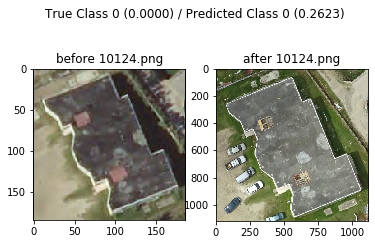

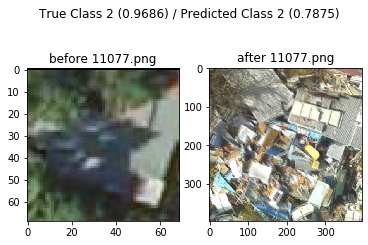

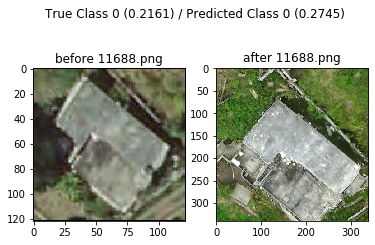

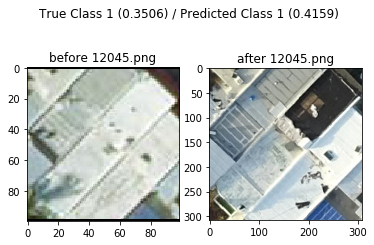

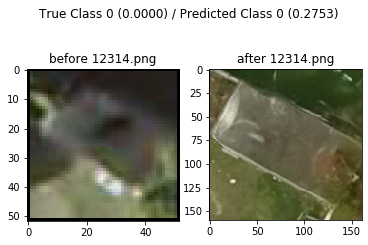

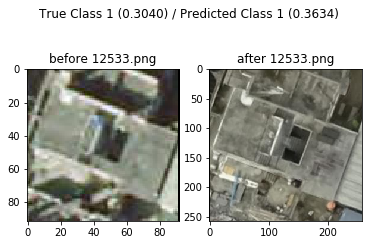

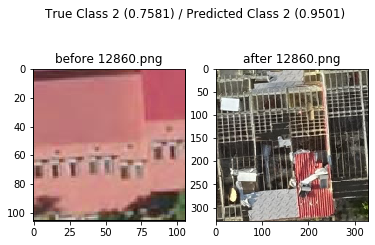

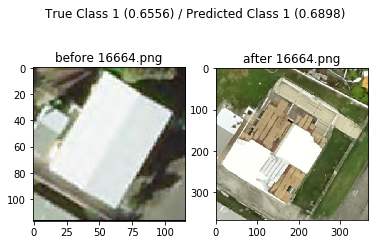

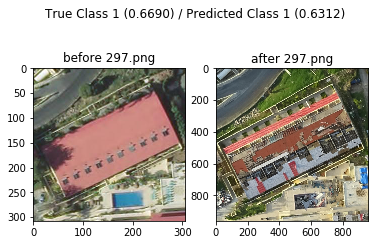

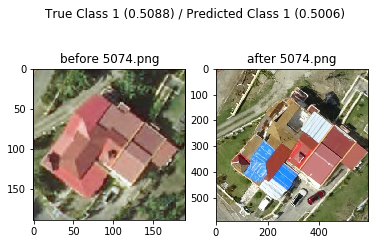

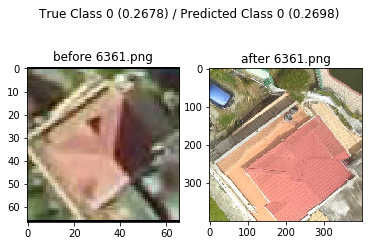

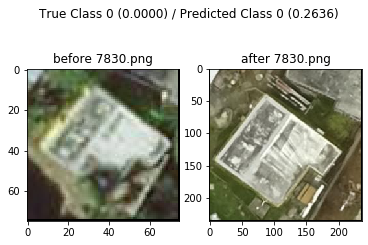

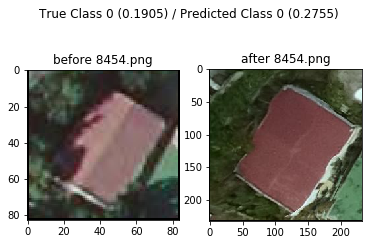

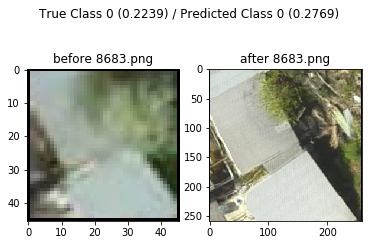

<IPython.core.display.Javascript object>

In [11]:
inspect_regression_files(regression_correct_indexes)

# 14 (total) - 9 (correct) - 5 (wrong)

# object_id.png - model is correct/wrong - not damaged / partially damaged / significantly damaged - visual explanation
# 10124.png - model is wrong (blame label) - partially damaged - there are two holes on the roof
# 11077.png - model is correct - significantly damaged - obvious visible damage, building structure collapsed
# 11688.png - model is correct - not damaged - some debris, no visible damage
# 12045.png - model is correct - partially damaged - top part of the roof is missing
# 12314.png - model is correct - not damaged - there is no visible difference after event
# 12533.png - model is wrong (blame label) - not damaged - structure is intact, some debris
# 12860.png - model is correct - significantly damaged - most of the roof is severely damaged
# 16664.png - model is wrong (blame label) - significantly damaged - roof is mostly damaged
# 297.png - model is wrong (blame label) - significantly damaged - most of the roof is severely damaged
# 5074.png - model is wrong (blame label) - significantly damaged - most of the roof is missing
# 6361.png - model is correct - not damaged - there is no visible difference after event
# 7830.png - model is correct - not damaged - no structural damage, little debris
# 8454.png - model is correct - not damaged - there is no visible difference after event, some debris at right edge
# 8683.png - model is correct - not damaged - no damage to roof, some debris on the right

## Correct Predictions by Classification

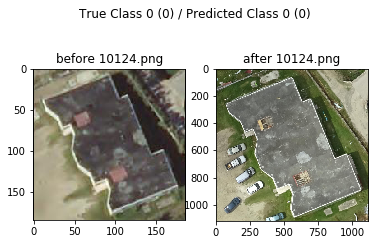

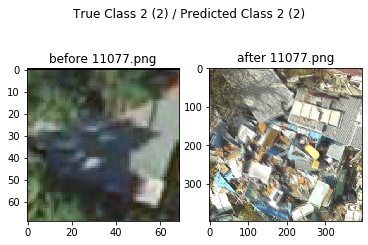

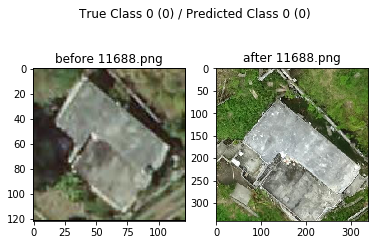

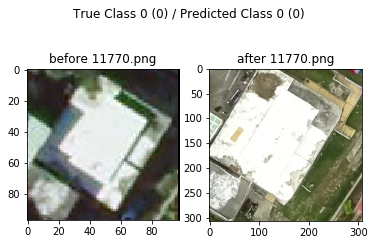

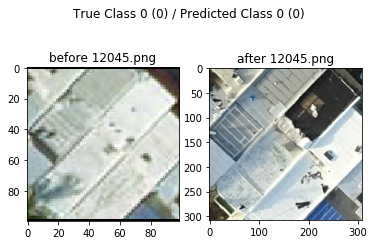

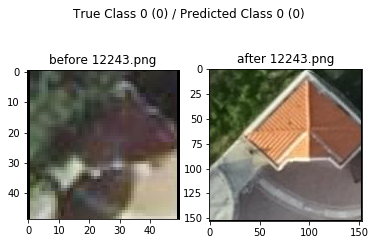

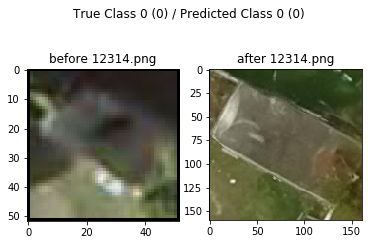

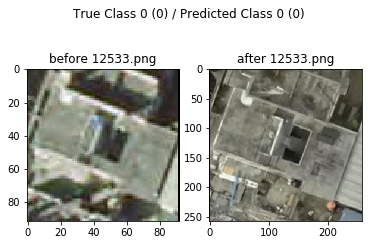

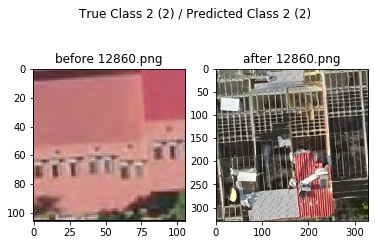

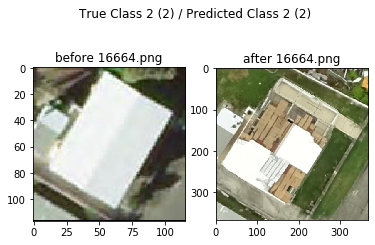

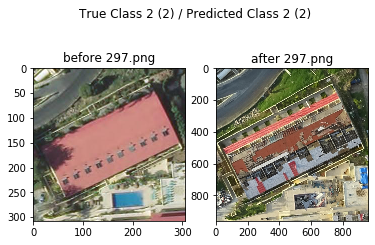

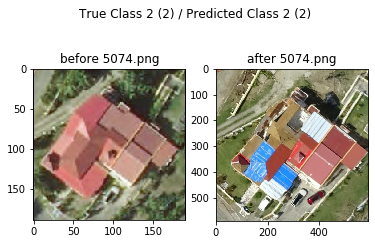

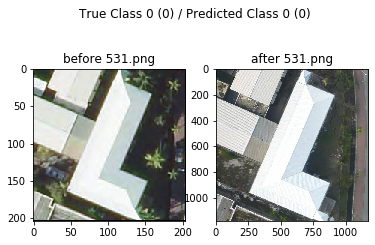

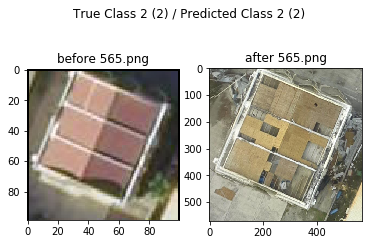

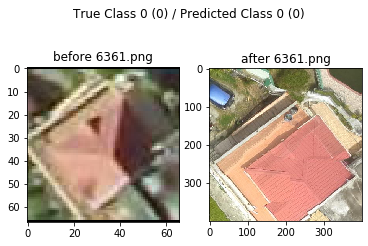

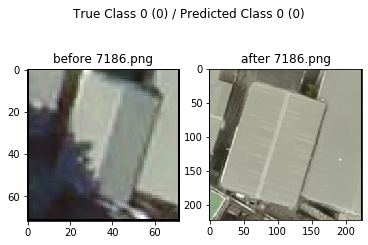

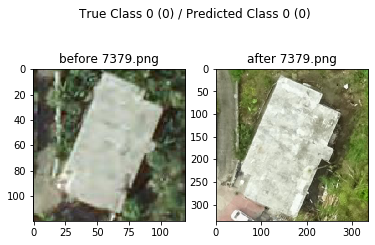

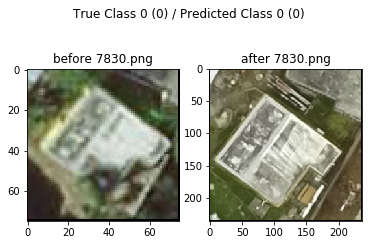

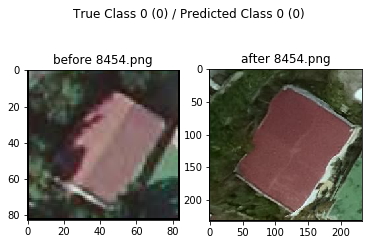

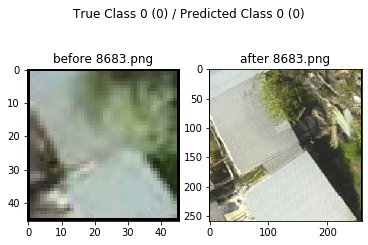

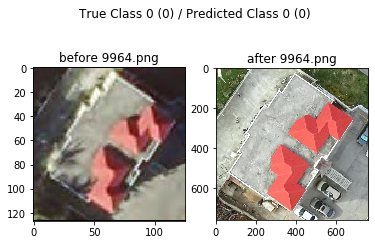

<IPython.core.display.Javascript object>

In [12]:
inspect_classification_files(classification_correct_indexes)

# 21 (total) - 18 (correct) - 3 (wrong)

# object_id.png - model is correct/wrong - not damaged / partially damaged / significantly damaged - visual explanation
# 10124.png - model is wrong (blame label) - partially damaged - there are two holes on the roof
# 11077.png - model is correct - significantly damaged - obvious visible damage, building structure collapsed
# 11688.png - model is correct - not damaged - some debris, no visible damage
# 11770.png - model is wrong (blame label) - partially damaged - many damaged areas on the roof, most structure is intact, some walls on the floor
# 12045.png - model is wrong (blame label) - partially damaged - top part of the roof is missing
# 12243.png - model is correct - not damaged - there is no visible difference after event
# 12314.png - model is correct - not damaged - there is no visible difference after event
# 12533.png - model is correct - not damaged - structure is intact, some debris
# 12860.png - model is correct - significantly damaged - most of the roof is severely damaged
# 16664.png - model is correct - significantly damaged - roof is mostly damaged
# 297.png - model is correct - significantly damaged - most of the roof is severely damaged
# 5074.png - model is correct - significantly damaged - most of the roof is missing
# 531.png - model is correct - not damaged - there is no visible difference after event
# 565.png - model is correct - significantly damaged - roof is completely damaged
# 6361.png - model is correct - not damaged - there is no visible difference after event
# 7186.png - model is correct - not damaged - there is no visible difference after event
# 7379.png - model is correct - not damaged - there is no visible difference after event
# 7830.png - model is correct - not damaged - no structural damage, little debris
# 8454.png - model is correct - not damaged - there is no visible difference after event, some debris at right edge
# 8683.png - model is correct - not damaged - no damage to roof, some debris on the right
# 9964.png - model is correct - not damaged - there is no visible difference after event

## Wrong Predictions by Regression

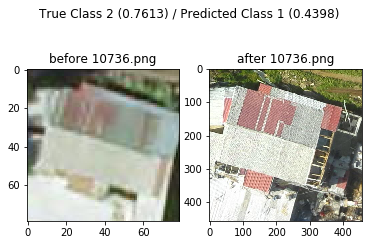

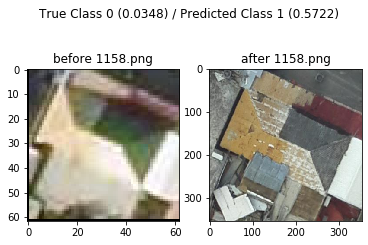

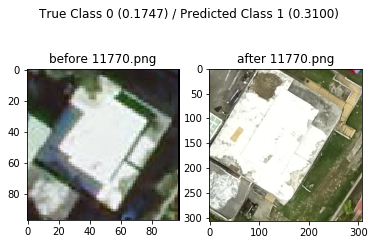

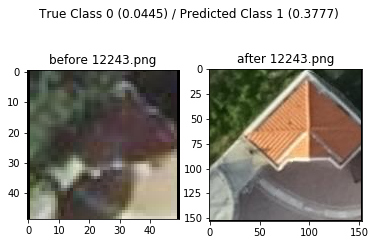

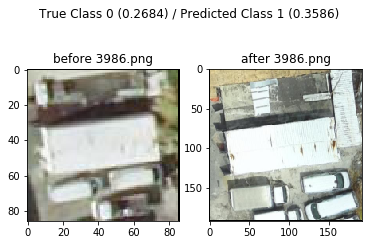

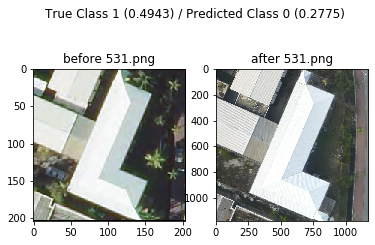

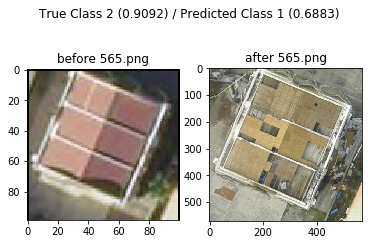

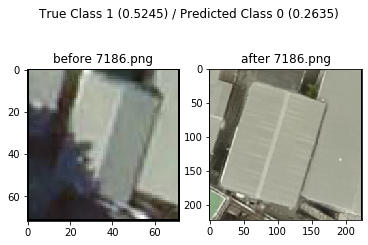

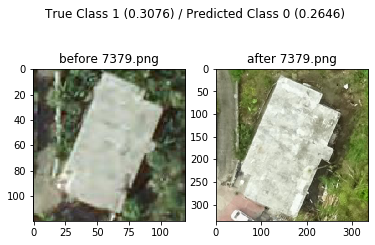

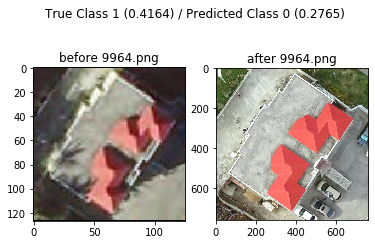

<IPython.core.display.Javascript object>

In [13]:
inspect_regression_files(regression_wrong_indexes)

# 10 (total) - 6 (correct) - 4 (wrong)

# object_id.png - model is correct/wrong - not damaged / partially damaged / significantly damaged - visual explanation
# 10736.png - model is wrong - significantly damaged - most of roof is okay but right edge is completely destroyed
# 1158.png - model is correct - partially damaged - roof is damaged but structure is intact
# 11770.png - model is correct - partially damaged - many damaged areas on the roof, most structure is intact, some walls on the floor
# 12243.png - model is wrong (blame model) - not damaged - there is no visible difference after event
# 3986.png - model is wrong (blame model / trees uprooted) - not damaged - just a few scratches, no holes or structural damage
# 531.png - model is correct - not damaged - there is no visible difference after event
# 565.png - model is wrong (but very close) - significantly damaged - roof is completely damaged
# 7186.png - model is correct - not damaged - there is no visible difference after event
# 7379.png - model is correct - not damaged - there is no visible difference after event
# 9964.png - model is correct - not damaged - there is no visible difference after event

## Wrong Predictions by Classification

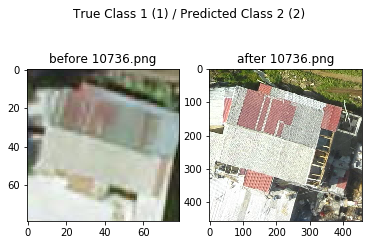

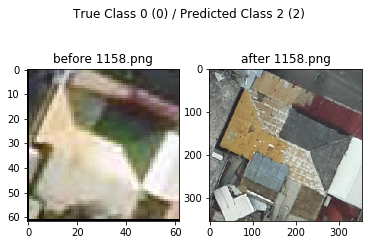

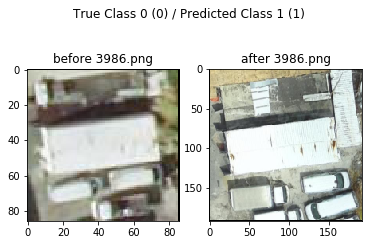

<IPython.core.display.Javascript object>

In [14]:
inspect_classification_files(classification_wrong_indexes)

# 3 (total) - 1 (correct) - 3 (wrong)

# object_id.png - model is correct/wrong - not damaged / partially damaged / significantly damaged - visual explanation
# 10736.png - model is correct - significantly damaged - most of roof is okay but right edge is completely destroyed
# 1158.png - model is wrong - partially damaged - roof is damaged but structure is intact
# 3986.png - model is wrong (blame model / trees uprooted) - not damaged - just a few scratches, no holes or structural damage

## Human Evaluation

In [15]:
print(mutual_filenames)

['10124.png', '10736.png', '11077.png', '1158.png', '11688.png', '11770.png', '12045.png', '12243.png', '12314.png', '12533.png', '12860.png', '16664.png', '297.png', '3986.png', '5074.png', '531.png', '565.png', '6361.png', '7186.png', '7379.png', '7830.png', '8454.png', '8683.png', '9964.png']


<IPython.core.display.Javascript object>

In [16]:
human_filename_predictions = {
    "10124.png": 1,
    "10736.png": 2,
    "11077.png": 2,
    "1158.png": 1,
    "11688.png": 0,
    "11770.png": 1,
    "12045.png": 1,
    "12243.png": 0,
    "12314.png": 0,
    "12533.png": 0,
    "12860.png": 2,
    "16664.png": 2,
    "297.png": 2,
    "3986.png": 0,
    "5074.png": 2,
    "531.png": 0,
    "565.png": 2,
    "6361.png": 0,
    "7186.png": 0,
    "7379.png": 0,
    "7830.png": 0,
    "8454.png": 0,
    "8683.png": 0,
    "9964.png": 0,
}

human_predictions = [
    human_filename_predictions[filename] for filename in mutual_filenames
]

human_classification_labels_accuracy = accuracy_score(
    classification_labels, human_predictions, normalize=True
)
human_regression_labels_accuracy = accuracy_score(
    regression_labels, human_predictions, normalize=True
)
human_classification_labels_correct = accuracy_score(
    classification_labels, human_predictions, normalize=False
)
human_regression_labels_correct = accuracy_score(
    regression_labels, human_predictions, normalize=False
)


human_classification_predictions_accuracy = accuracy_score(
    classification_predictions, human_predictions, normalize=True
)
human_regression_predictions_accuracy = accuracy_score(
    regression_predictions, human_predictions, normalize=True
)
human_classification_predictions_correct = accuracy_score(
    classification_predictions, human_predictions, normalize=False
)
human_regression_predictions_correct = accuracy_score(
    regression_predictions, human_predictions, normalize=False
)

print(
    "Classification Predictions compared with Classification Labels:\t\tAccuracy: {:.4f}\tCorrect: {}".format(
        classification_accuracy, classification_correct
    )
)
print(
    "Human Predictions compared with Classification Labels:\t\t\tAccuracy: {:.4f}\tCorrect: {}".format(
        human_classification_labels_accuracy, human_classification_labels_correct
    )
)
print(
    "Human Predictions compared with Classification Predictions:\t\tAccuracy: {:.4f}\tCorrect: {}".format(
        human_classification_predictions_accuracy,
        human_classification_predictions_correct,
    )
)
print("\n")
print(
    "Regression Predictions compared with Regression Predictions:\t\tAccuracy: {:.4f}\tCorrect: {}".format(
        regression_accuracy, regression_correct
    )
)
print(
    "Human Predictions compared with Regression Labels:\t\t\tAccuracy: {:.4f}\tCorrect: {}".format(
        human_regression_labels_accuracy, human_regression_labels_correct
    )
)
print(
    "Human Predictions compared with Regression Predictions:\t\t\tAccuracy: {:.4f}\tCorrect: {}".format(
        human_regression_predictions_accuracy, human_regression_predictions_correct
    )
)

Classification Predictions compared with Classification Labels:		Accuracy: 0.8750	Correct: 21
Human Predictions compared with Classification Labels:			Accuracy: 0.7917	Correct: 19
Human Predictions compared with Classification Predictions:		Accuracy: 0.7917	Correct: 19


Regression Predictions compared with Regression Predictions:		Accuracy: 0.5833	Correct: 14
Human Predictions compared with Regression Labels:			Accuracy: 0.5417	Correct: 13
Human Predictions compared with Regression Predictions:			Accuracy: 0.6250	Correct: 15


<IPython.core.display.Javascript object>

In [17]:
prediction_tuples = list(
    zip(classification_predictions, regression_predictions, human_predictions)
)

filtered_prediction_tuples = [
    prediction_tuple
    for prediction_tuple in prediction_tuples
    if not (
        (prediction_tuple[0] == prediction_tuple[1])
        and (prediction_tuple[0] == prediction_tuple[2])
    )
]

different_from_classification = [
    filtered_prediction_tuple
    for filtered_prediction_tuple in filtered_prediction_tuples
    if not (filtered_prediction_tuple[0] == filtered_prediction_tuple[2])
]

different_from_regression = [
    filtered_prediction_tuple
    for filtered_prediction_tuple in filtered_prediction_tuples
    if not (filtered_prediction_tuple[1] == filtered_prediction_tuple[2])
]

print(
    "{} Human Predictions are different from corresponding Classification Predictions.".format(
        len(different_from_classification)
    )
)
print(
    "{} Human Predictions are different from corresponding Regression Predictions.".format(
        len(different_from_regression)
    )
)

5 Human Predictions are different from corresponding Classification Predictions.
9 Human Predictions are different from corresponding Regression Predictions.


<IPython.core.display.Javascript object>

## Results

### Regression
```
24 (total classified)                     - 15 (correct to human) - 9 (wrong to human)
14 (total correctly classified to labels) -  9 (correct to human) - 5 (wrong to human)
10 (total wrongly classified to labels)   -  6 (correct to human) - 4 (wrong to human)
```
#### For
I found that the regression model actually learned to place damage on a scale although not at the extremes (0 and 1)

`11736.png`: score is above the lower damage boundary (maybe) because of the damage in the right edge but still in partial damage as most of the root is intact

`11770.png`: I'm not very confident that the building is partially damaged, the models shows this by giving a score of `0.31` which is right on the edge

`565.png`: model is wrong but gives a very high damage score close to the upper boundary indicating that the building may have higher damage than others in the class

#### Against
`12243.png` the model is completely off

`3986.png` model assigns a relatively high damage score `0.35` a bit away from the boundary (maybe it was put off by the trees)

`7186.png` and `7379.png` are given a score of `0.26` which is okay but `9964.png` gets `0.276` which implies more visible damage but there is none (maybe because of partially red roof)

### Classification
```
24 (total classified)                     - 19 (correct to human) - 6 (wrong to human)
21 (total correctly classified to labels) - 18 (correct to human) - 3 (wrong to human)
3 (total wrongly classified to labels)    -  1 (correct to human) - 3 (wrong to human)
```
#### For
`10736.png` model correctly identifies the major damage to the right edge of the building

`1158.png` although the label is wrong, the model identifies a major part of the roof is damaged which was my first inference based on inspection

`10124.png` model marks building as no damage because mostly it's true

#### Against
`3986.png` model marks as partial damage (maybe it was put off by the trees)

`11770.png` I'm not very confident that the building is partially damaged but visually I would mark it as partially damaged but the model classifies as no damage

`12045.png` model completely ignores the damaged roof which is obvious

### Interpretation of the numbers

Although the prediction matches the label, regression model gets 5 wrong according to visual inspection.

Although the prediction matches the label, classification model gets 3 wrong according to visual inspection.

*Classification does better when prediction matches the label.*

Although the prediction does not match the label, regression model gets 6 correct according to visual inspection.

Although the prediction does not match the label, classification model gets 1 correct according to visual inspection.

*Regression does better when prediction does not match the label.*

The other numbers ((9, 18), (4, 3)) can be explained simply by crediting/blaming the labels.

When prediction does not match the label is of **higher significance** because the model gets more predictions correct despite bad labels.

#### The classification model sufficiently learns to outperform the regression model and matches human predictions.
#### The regression model is more robust to the definition of damage, it shows the potential of better performance with better labels.

Keeping in mind the below points,
1. Our classification model gives better performance out of the box.
2. Classification models train more easily than regression models.
3. There are 2 additional threshold hyper-parameters in the regression approach. (Also gives us flexibility on the definition of damage. Also, some datapoints we close to the decision boundary of the correct class.)
4. Our regression model showed promise of a better performance with better labels.

# My conclusion is to continue with the regression model to keep manual control of the damage thesholds and the hope of better quality of labels in future datasets.